In [1]:
# 필요한 기본 package 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

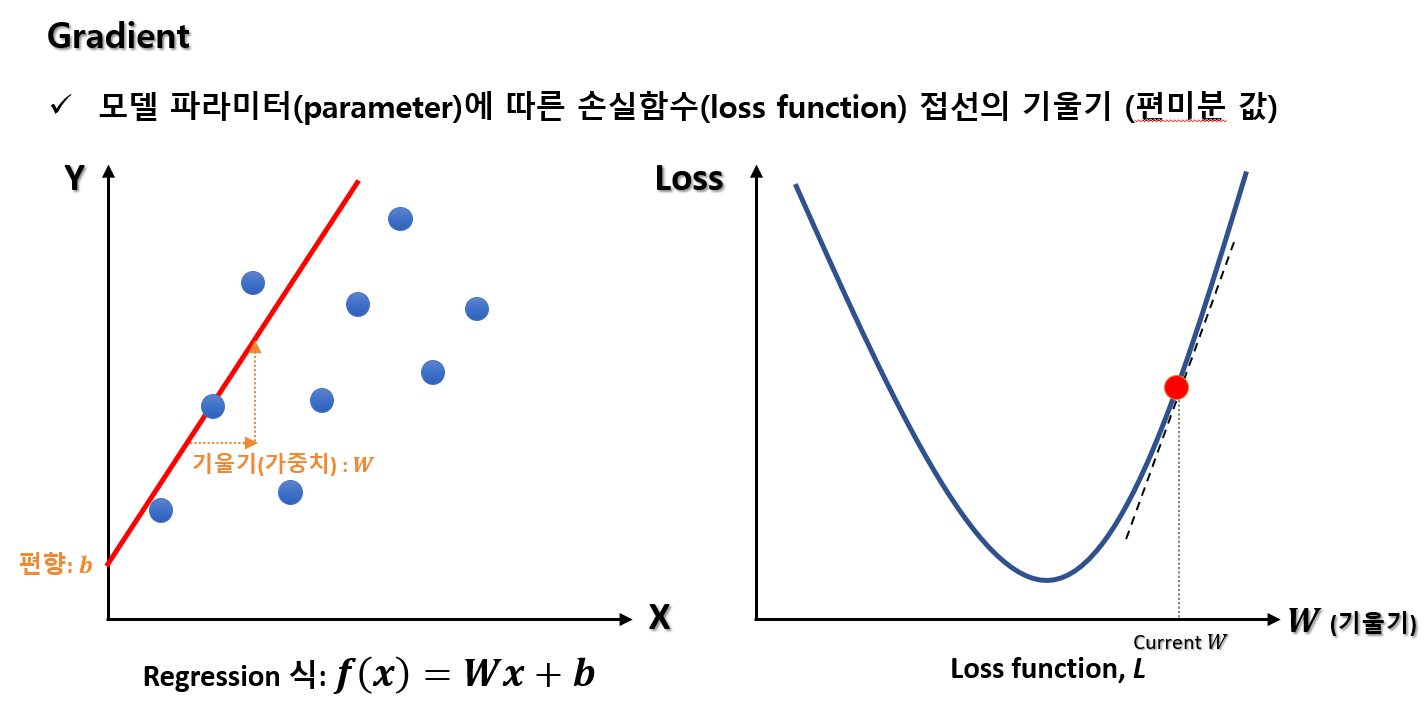

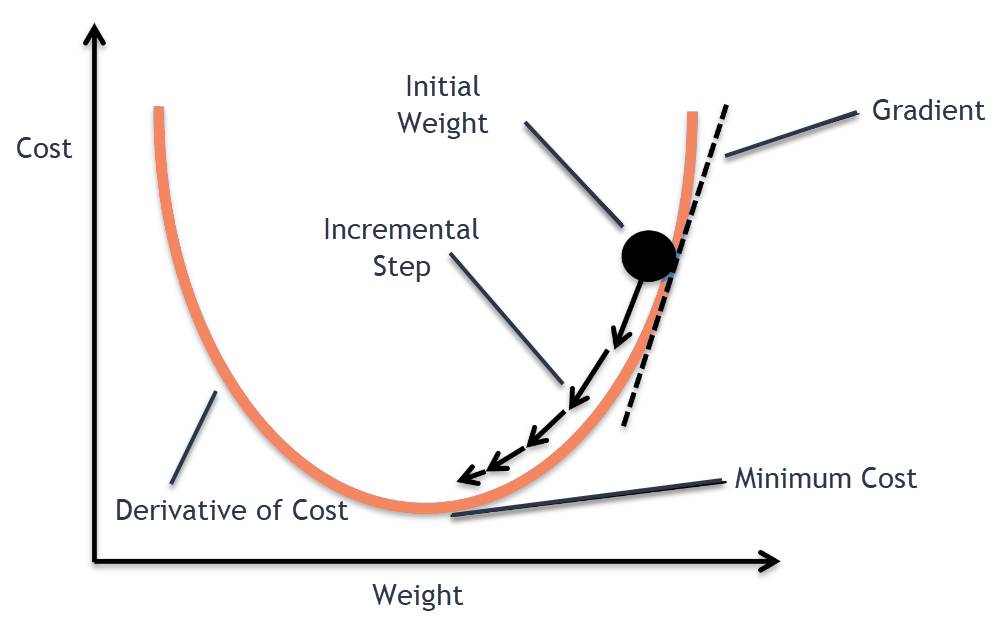

### **(1) 단항식 구현**

In [2]:
# Sample dataset 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise1 = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise1

    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

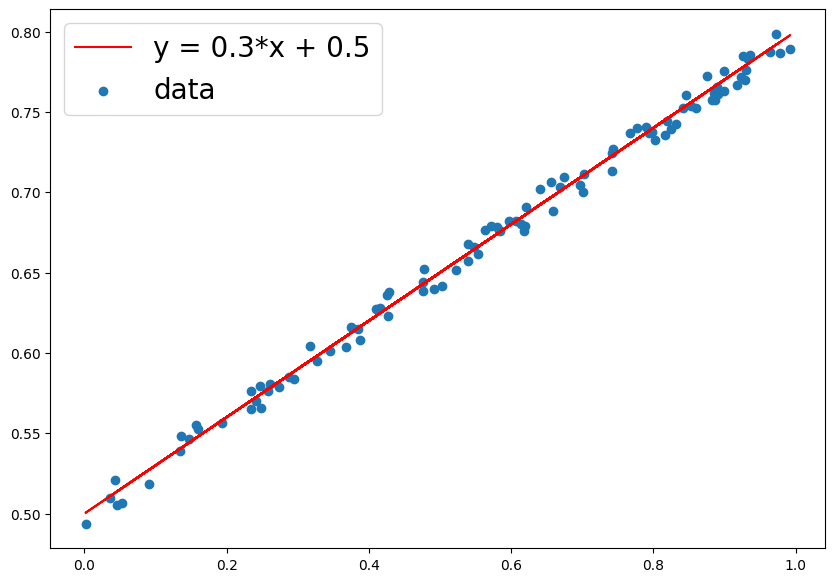

w: 0.3, b: 0.5


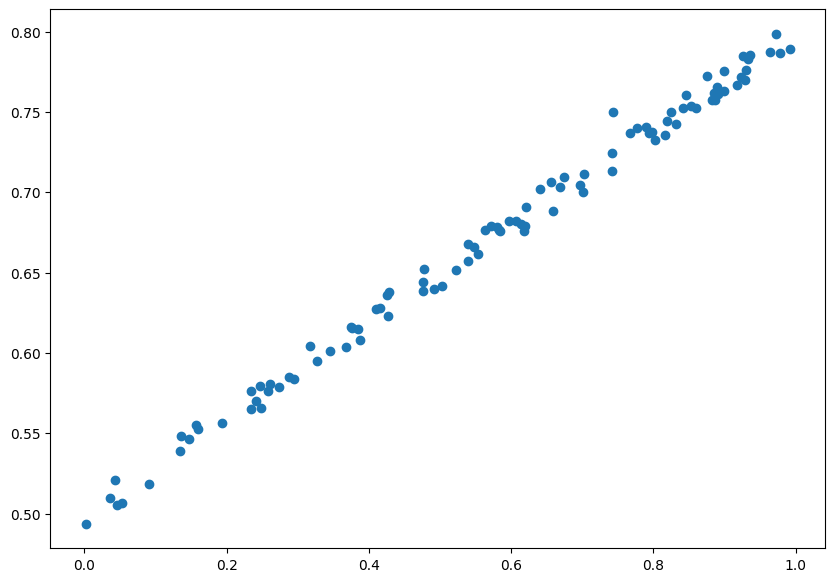

In [3]:
# 임의의 linear model 생성
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

# 임의로 2개의 outlier를 추가
y[5] = 0.75
y[10] = 0.75

plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.show()

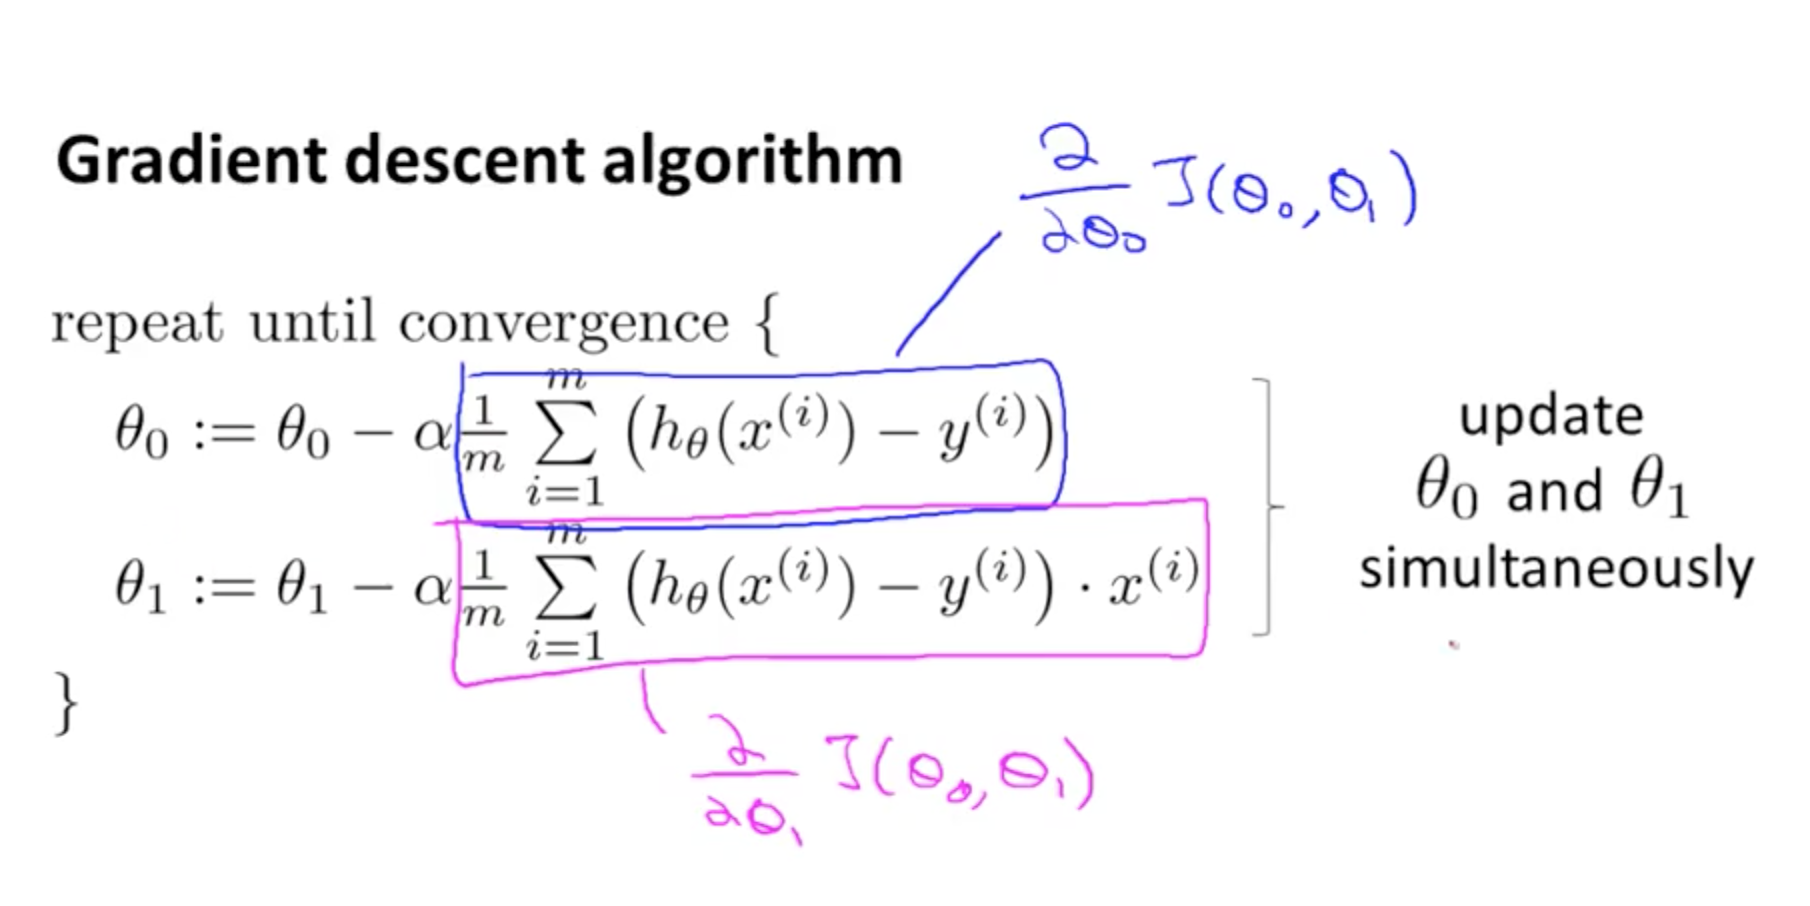

In [4]:
# 최대 반복 횟수
num_epoch = 5000

# 학습율 (learning_rate)
learning_rate = 0.5

In [5]:
# Gradient Descent 구현

errors = []
# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    y_hat = x * w + b

    error = ((y_hat - y)**2).mean()

    if error < 0.0005:
        break

    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.06263, b = 0.50391 error = 0.17988
 5 w = 0.14733, b = 0.59129 error = 0.00192
10 w = 0.16780, b = 0.57944 error = 0.00145
15 w = 0.18534, b = 0.56885 error = 0.00110
20 w = 0.20054, b = 0.55966 error = 0.00084
25 w = 0.21371, b = 0.55171 error = 0.00064
------------------------------------------------------------
30 w = 0.2, b = 0.5 error = 0.00049


## 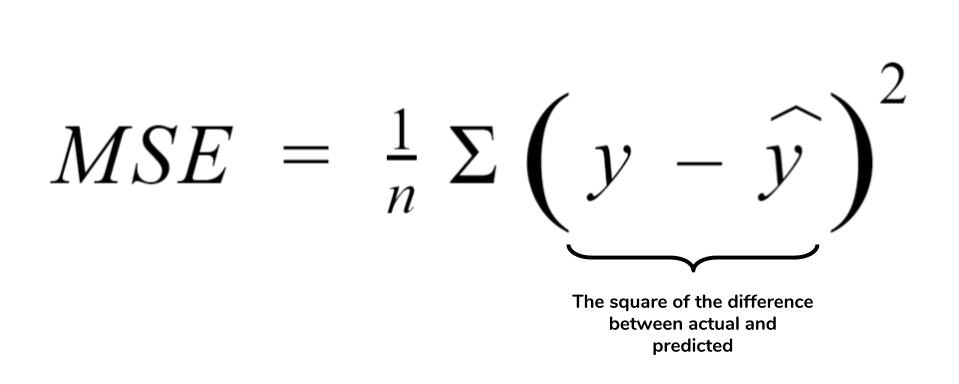

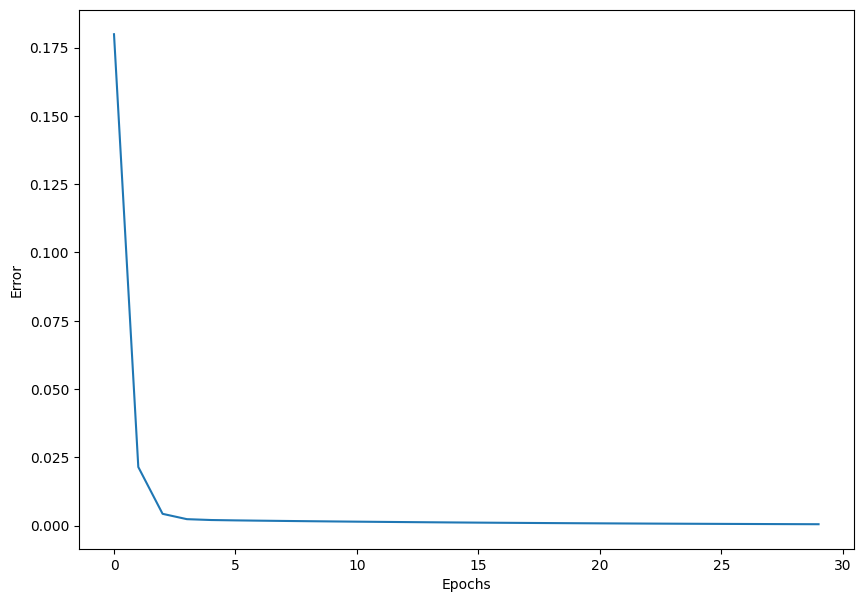

In [6]:
# Loss 변화 시각화
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### **(2) 다항식 구현**

In [9]:
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

In [10]:
# Gradient Descent 구현
errors = []
w1_grad = []
w2_grad = []
w3_grad = []

num_epoch=5000
learning_rate=0.5

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)
#b2 = np.random.uniform(low=-1.0, high=1.0)
#b3 = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    # 예측값
    y_hat = w1 * x1 + w2 * x2 + w3 * x3 + b

    error = ((y_hat - y)**2).mean()
    if error < 0.00001:
        break

    # 미분값 적용 (Gradient)
    w1 = w1 - learning_rate * ((y_hat - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_hat - y) * x2).mean()
    w3 = w3 - learning_rate * ((y_hat - y) * x3).mean()

    w1_grad.append(w1)
    w2_grad.append(w2)
    w3_grad.append(w3)

    b = b - learning_rate * (y_hat - y).mean()

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:.2f} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f}, b = {4:.5f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

print("----" * 15)
print("{0:.2f} w1 = {1:.1f}, w2 = {2:.1f}, w3 = {3:.1f}, b = {4:.1f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

0.00 w1 = 0.66797, w2 = 0.83228, w3 = 0.63141, b = 0.18193 error = 0.26667
5.00 w1 = 0.58668, w2 = 0.67930, w3 = 0.56618, b = 0.33738 error = 0.21706
10.00 w1 = 0.51298, w2 = 0.54945, w3 = 0.50401, b = 0.47160 error = 0.18015
15.00 w1 = 0.44725, w2 = 0.43977, w3 = 0.44628, b = 0.58924 error = 0.15216
20.00 w1 = 0.38873, w2 = 0.34692, w3 = 0.39305, b = 0.69238 error = 0.13086
25.00 w1 = 0.33674, w2 = 0.26811, w3 = 0.34429, b = 0.78282 error = 0.11462
30.00 w1 = 0.29061, w2 = 0.20107, w3 = 0.29983, b = 0.86214 error = 0.10220
35.00 w1 = 0.24973, w2 = 0.14392, w3 = 0.25949, b = 0.93174 error = 0.09269
40.00 w1 = 0.21355, w2 = 0.09508, w3 = 0.22301, b = 0.99280 error = 0.08539
45.00 w1 = 0.18156, w2 = 0.05327, w3 = 0.19013, b = 1.04639 error = 0.07978
50.00 w1 = 0.15329, w2 = 0.01740, w3 = 0.16057, b = 1.09342 error = 0.07548
55.00 w1 = 0.12834, w2 = -0.01342, w3 = 0.13406, b = 1.13471 error = 0.07216
60.00 w1 = 0.10633, w2 = -0.03997, w3 = 0.11034, b = 1.17095 error = 0.06961
65.00 w1 = 0

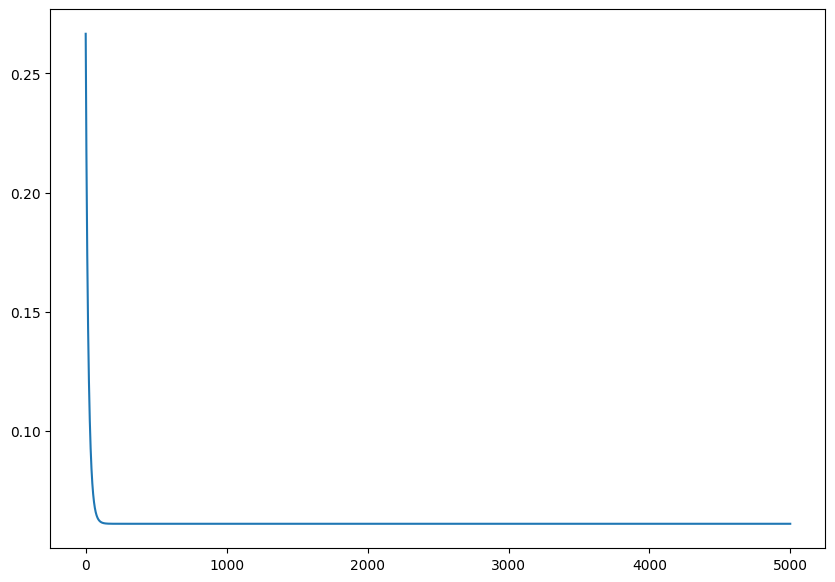

In [11]:
# loss 변화 시각화
plt.figure(figsize=(10, 7))

plt.plot(errors)

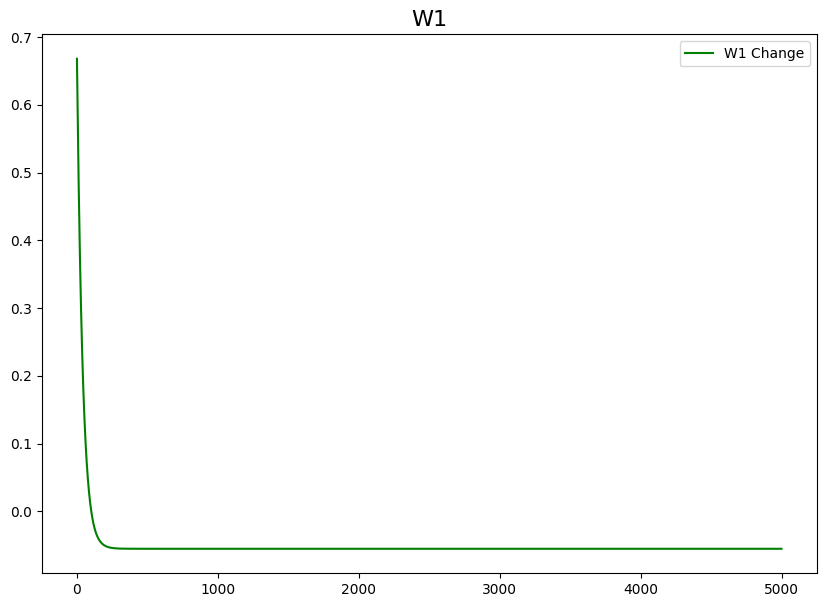

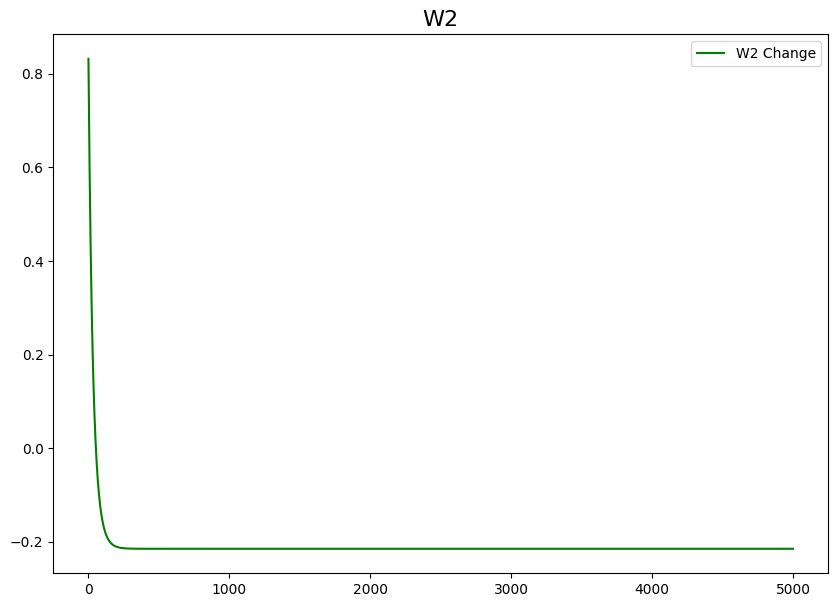

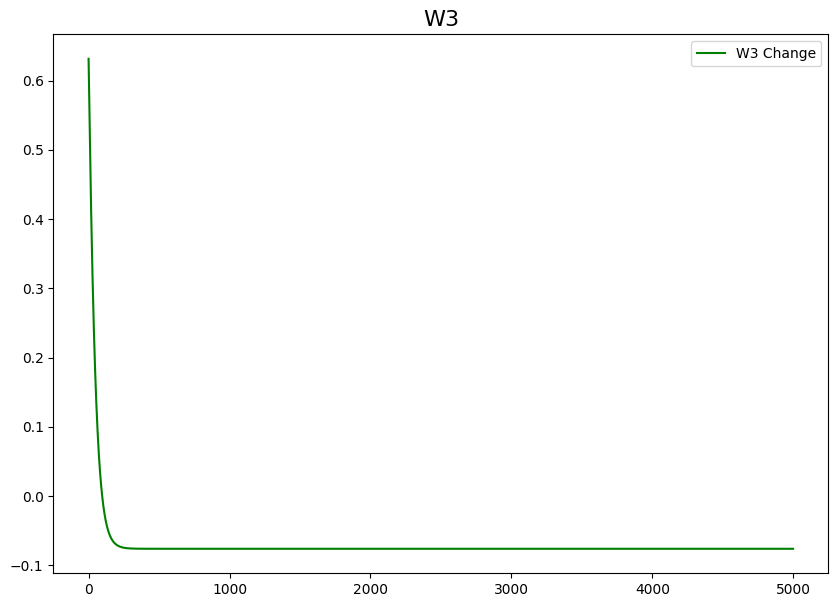

In [12]:
# 가중치(W1, W2, W3) 값들의 변화 시각화

plt.figure(figsize=(10, 7))
plt.plot(w1_grad, color='g')
plt.title('W1', fontsize=16)
plt.legend(['W1 Change', 'W1'])
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(w2_grad, color='g')
plt.title('W2', fontsize=16)
plt.legend(['W2 Change', 'W2'])
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(w3_grad, color='g')
plt.title('W3', fontsize=16)
plt.legend(['W3 Change', 'W3'])
plt.show()